<a href="https://colab.research.google.com/github/joaopedrogoncalvesjr/JoaoPedroGoncalves/blob/main/Trilha_1_Tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Texto escolhido: Artigo sobre Barack Obama.
Conclusões: ao não filtrar stopwords, os artigos e preposições tornam-se mais significativos e podem atrapalhar a leitura de qual a palavra mais frequente no texto, mas ao ignorar tais palavras, o esperado acontece: Num artigo sobre Barack Obama, a palavra que mais se repete é "Obama", confirmando a Lei de Zipf de que as palavras mais frequentes podem dar um pista acerca do que ele se refere.

In [4]:
import urllib.request  

texto = []

for line in urllib.request.urlopen('https://raw.githubusercontent.com/joaopedrogoncalvesjr/JoaoPedroGoncalves/main/barack%20obama.txt'): 
    texto.append(line.decode('utf-8'))

# f = open('/kate_beckinsale.txt','r')    # para arquivos locais
# for line in f:
#    texto.append(line)

for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','') # elimina ' e "

In [5]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(mydict) 

{'barack': 12, 'hussein': 2, 'obama': 155, 'ii': 2, 'honolulu': 6, '4': 4, 'de': 465, 'agosto': 9, '1961': 4, 'é': 4, 'um': 67, 'advogado': 3, 'e': 176, 'político': 2, 'norte-americano': 3, 'que': 95, 'serviu': 3, 'como': 44, 'o': 174, '44º': 2, 'presidente': 31, 'dos': 44, 'estados': 19, 'unidos': 15, '2009': 15, 'a': 218, '2017': 2, 'sendo': 8, 'primeiro': 12, 'afro-americano': 3, 'ocupar': 1, 'cargo': 3, 'nascido': 1, 'em': 242, 'no': 66, 'havaí': 10, 'graduado': 1, 'ciência': 2, 'política': 14, 'pela': 11, 'universidade': 11, 'columbia': 3, 'direito': 8, 'harvard': 6, 'onde': 11, 'foi': 34, 'da': 71, 'law': 4, 'review': 3, 'também': 10, 'atuou': 1, 'organizador': 3, 'comunitário': 3, 'na': 52, 'defesa': 3, 'direitos': 6, 'civis': 3, 'ensinou': 2, 'constitucional': 3, 'escola': 9, 'chicago': 15, 'entre': 16, '1992': 4, '2004': 11, 'representou': 1, 'por': 37, 'três': 7, 'mandatos': 1, '13º': 2, 'distrito': 4, 'senado': 18, 'illinois': 9, '1994': 2, 'tentando': 1, 'eleger-se': 1, 'se

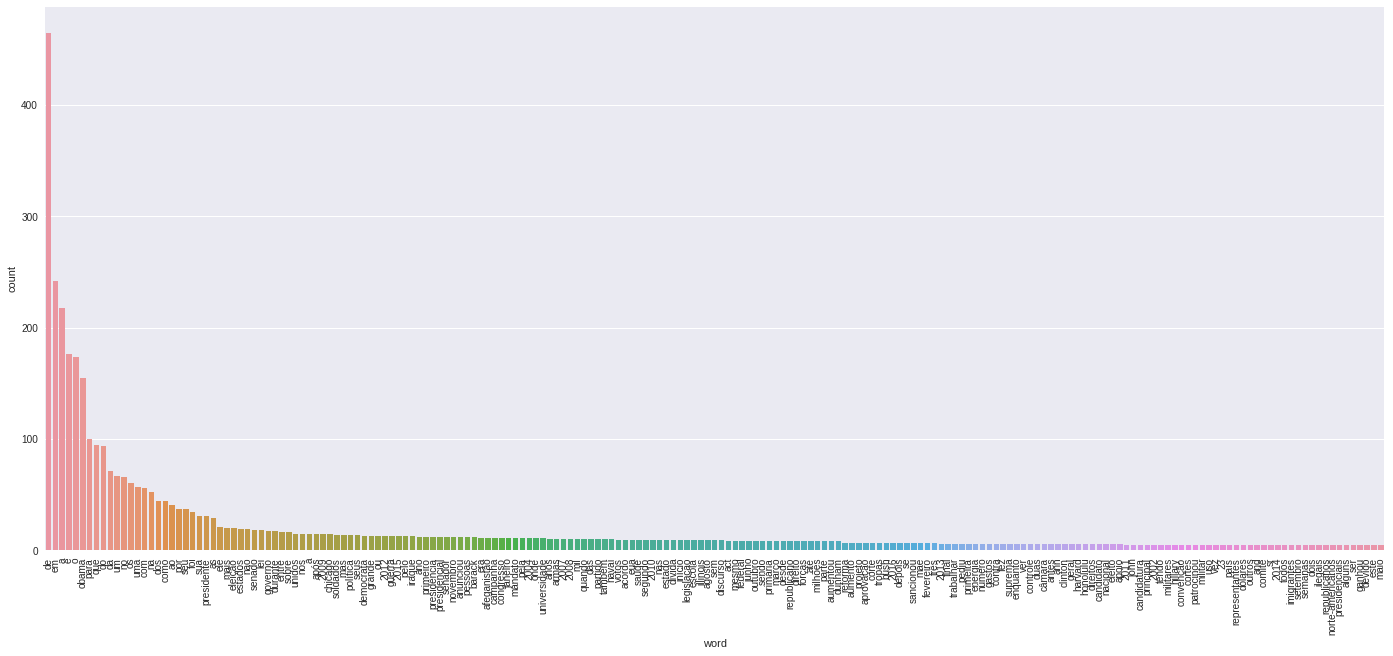

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()